In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('sales_data.csv')

print(data.head())

         Date  Sales  Profit Region  CustomerID
0  2025-01-01    500      50  North           1
1  2025-01-02    700     100  South           2
2  2025-01-03    300      30   East           3
3  2025-01-04    900     150   West           4
4  2025-01-05    400      40  North           5


In [3]:
total_revenue = data['Sales'].sum()

print(f"Total Revenue: ${total_revenue}")

Total Revenue: $6600


In [4]:
total_profit = data['Profit'].sum()

gross_profit_margin = (total_profit / total_revenue) * 100
print(f'Gross Profit Margin: {gross_profit_margin:.2f}%')

Gross Profit Margin: 14.70%


In [5]:
data['Sales Growth'] = data['Sales'].pct_change() * 100
print(data[['Date','Sales Growth']].tail())

         Date  Sales Growth
5  2025-01-06    100.000000
6  2025-01-07    -25.000000
7  2025-01-08     66.666667
8  2025-01-09    -25.000000
9  2025-01-10    -13.333333


In [6]:
total_orders = len(data)

average_order_value = total_revenue / total_orders
print(f'Average Order Value ${average_order_value:.2f}' )

Average Order Value $660.00


In [7]:
purchase_frequency = data.groupby('CustomerID')['Sales'].count().mean(    )
average_purchase_value = data.groupby('CustomerID')['Sales'].sum().mean()
customer_lifespan = 5


clv = average_purchase_value * purchase_frequency * customer_lifespan
print(f'Customer Lifetime Value: ${clv:.2f}')

Customer Lifetime Value: $3300.00


In [8]:
regional_sales = data.groupby('Region')['Sales'].sum()
print(regional_sales)

Region
East      900
North    1650
South    2150
West     1900
Name: Sales, dtype: int64


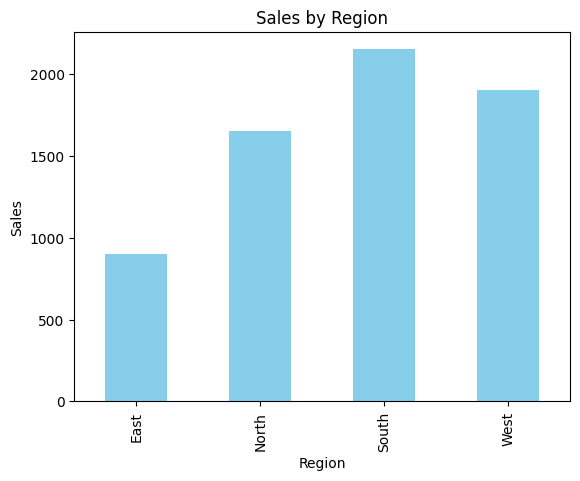

In [9]:
regional_sales.plot(kind='bar',title='Sales by Region',color='skyblue')
plt.ylabel('Sales')
plt.show()

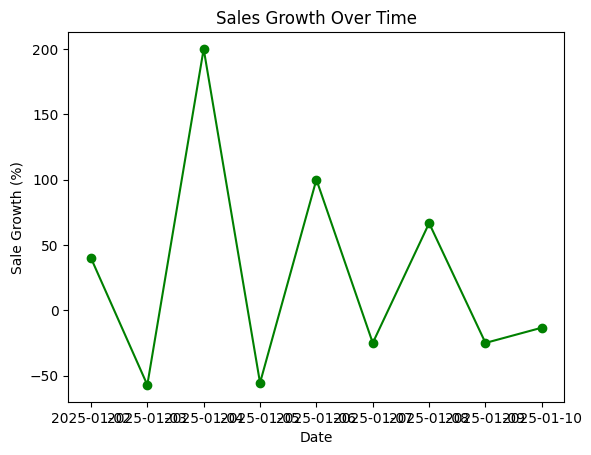

In [10]:
plt.plot(data['Date'],data['Sales Growth'],marker='o',linestyle='-',color='green')
plt.title('Sales Growth Over Time')
plt.xlabel('Date')
plt.ylabel('Sale Growth (%)')
plt.show()

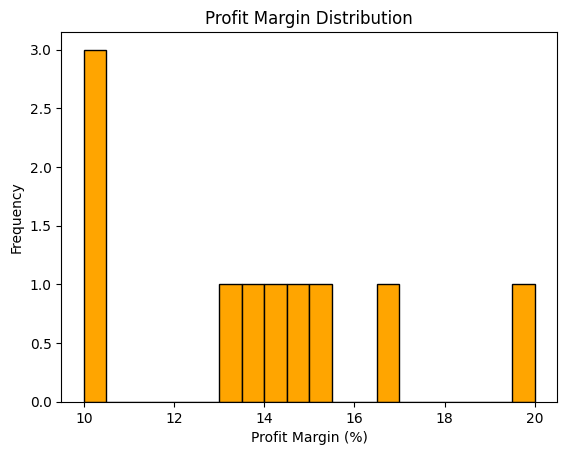

In [11]:
plt.hist(data['Profit'] / data['Sales'] * 100,bins=20, color='orange',edgecolor='black')
plt.title('Profit Margin Distribution')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Frequency')
plt.show()

In [12]:
kpi_summary = {
    'Total Revenue':[total_revenue],
    'Gross Profit Margin (%)':[gross_profit_margin],
    'Average Order Value':[average_order_value],
    'Customer Lifetime Value':[clv]
}

kpi_df = pd.DataFrame(kpi_summary)
kpi_df.to_csv('Kpi_summary.csv',index=False)
print('KPI summary saved to kpi_summary.csv')

KPI summary saved to kpi_summary.csv


In [14]:
total_leads = data['Leads'].sum()
conversion_rate = (total_orders / total_leads) * 100

print(f'Sales Conversion: {conversion_rate:.2f}%')

KeyError: 'Leads'

In [16]:
np.random.seed(42)
data['Leads'] = np.random.randint(50,200,size=len(data))

total_leads = data['Leads'].sum()
conversion_rate = (total_orders / total_leads ) * 100

In [17]:
print(f'Simulated Sales Conversion Rate: {conversion_rate}')

Simulated Sales Conversion Rate: 0.7757951900698216


In [19]:
returning_customers = data['CustomerID'].duplicated()
total_customers = data['CustomerID'].nunique()

retention_rate = (returning_customers / total_customers) * 100
print(retention_rate)

#print(f'Customer Retention Rate: {retention_rate:.2f}%')

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: CustomerID, dtype: float64


In [20]:
revenue_per_customer = total_revenue / total_customers
print(f'Revenue Per Customer :${revenue_per_customer:.2f}')

Revenue Per Customer :$660.00


In [ ]:
product_profitability = data.groupby('Product')['Profit'].sum().sort_values(ascending=False)